<h1>Feather Tutorial</h1>

The required input images should be generated using feather_tutorial_create_initial_images.ipynb

In [1]:
from toolviper.dask.client import local_client
log_params = {'log_level':'DEBUG'}
worker_log_params = {'log_level':'DEBUG'}
viper_client = local_client(cores=8, memory_limit="32GiB",log_params=log_params,worker_log_params=worker_log_params)
#viper_client = local_client(serial_execution=True)
# viper_client

from astroviper.imaging import feather_v2
feather_v2(outim={"name": "feathered_image.img.zarr", "format": "zarr", "overwrite": True}, highres= 'int.zarr', lowres= 'sd.zarr', sdfactor=1)

[2025-03-28 22:03:03,325]     INFO    viperlog:  Checking functions availability: 
[2025-03-28 22:03:03,327]     INFO    viperlog:  Loading module: slurm -- Success 
[2025-03-28 22:03:03,328]     INFO    viperlog:     dask_jobqueue is available 
[2025-03-28 22:03:03,330]     INFO    viperlog:  Loading module: dask_ssh -- Fail 
[2025-03-28 22:03:03,330]     INFO    viperlog:     asyncssh is unavailable 
[2025-03-28 22:03:03,331]     INFO    viperlog:     jupyter_server_proxy is unavailable 
[2025-03-28 22:03:03,332]     INFO    viperlog:     paramiko is unavailable 
[2025-03-28 22:03:03,332]     INFO    viperlog:  Loading module: CUDA -- Fail 
[2025-03-28 22:03:03,334]     INFO    viperlog:     dask_cuda is unavailable 
[2025-03-28 22:03:03,334]     INFO    viperlog:  Available functions of this environment: slurm 
[2025-03-28 22:03:03,335]     INFO    viperlog:  Module path: /home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/toolviper 
[2025-03-28 22:03:03,343]  WAR

/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/dask/base.py:1105: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


(1, 1024, 1, 1024, 1024)


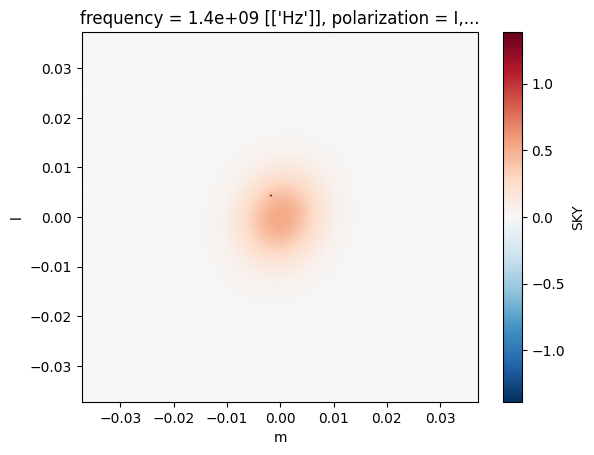

In [2]:
from xradio.image import load_image, read_image
feather_xds = load_image("feathered_image.img.zarr")
print(feather_xds.SKY.shape)

import numpy as np
np.nanmax(np.abs(feather_xds.SKY.values))
feather_xds.SKY.isel(polarization=0,frequency=0).plot()

In [3]:
feather_xds
# feather_xds.BEAM.shape

<xarray.Dataset> Size: 4GB
Dimensions:          (time: 1, frequency: 1024, polarization: 1, beam_param: 3,
                      l: 1024, m: 1024)
Coordinates:
  * beam_param       (beam_param) <U5 60B 'major' 'minor' 'pa'
    declination      (l, m) float64 8MB -0.2371 -0.237 ... -0.1628 -0.1627
  * frequency        (frequency) float64 8kB 1.4e+09 1.4e+09 ... 1.5e+09 1.5e+09
  * l                (l) float64 8kB 0.03723 0.03716 ... -0.03709 -0.03716
  * m                (m) float64 8kB -0.03723 -0.03716 ... 0.03709 0.03716
  * polarization     (polarization) <U1 4B 'I'
    right_ascension  (l, m) float64 8MB 0.6383 0.6383 0.6383 ... 0.5623 0.5623
  * time             (time) float64 8B 0.0
    velocity         (frequency) float64 8kB 1.035e+07 1.033e+07 ... -1.033e+07
Data variables:
    BEAM             (time, frequency, polarization, beam_param) float32 12kB ...
    SKY              (time, frequency, polarization, l, m) float32 4GB 0.0008...
Attributes:
    active_mask:  
    data_groups:  {'base': {}}
    direction:    {'latpole': {'attrs': {'type': 'quantity', 'units': ['rad']...

In [1]:
z = load_image("int.zarr")
z

NameError: name 'load_image' is not defined

In [ ]:
feather_xds.SKY.isel(polarization=0,frequency=0).isel(l=slice(1800,2200), m=slice(1800,2200)).plot()